In [ ]:
经验总结
1. 模型可以用来大概预测牛市初期，因为在熊市中predict=1的数量非常少，按月分布查看下图，熊市大部分时间数量小于10个

In [18]:
import lightgbm
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


model_file='month_reverse_gbdt_model.txt'
buy_point_predict_model = lightgbm.Booster(model_file=model_file)

features = buy_point_predict_model.feature_name()


# 测试熟悉的股票预测情况
df =  pd.read_csv("./month_reverse_3683_2018-12-21.tsv", sep="\t")

print(df.shape)

X = df[features]
y = df["target"]

y_predict = buy_point_predict_model.predict(X)

df['predict'] = y_predict

z = df[["code", "start_date", "gain","target", "predict"]]


2018-02-26
(957, 38)


In [24]:
now = datetime.now()
start = now - timedelta(days=30)
start_date =  start.strftime("%Y-%m-%d")
print("start date:", start_date)

positives = z[(z["predict"] > 0.01) & (z["start_date"] >= start_date)]
print(positives.shape)
positives

start date: 2018-11-23
(98, 5)


,code,start_date,gain,target,predict
77,17,2018-12-06,2.621723,0,0.074517
366,401,2018-12-07,0.074074,0,0.109646
670,543,2018-12-07,0.000000,0,0.325572
815,582,2018-12-06,0.000000,0,0.115487
1775,876,2018-12-03,0.669344,0,0.153328
1868,902,2018-11-29,4.273504,0,0.201670
1935,917,2018-11-26,1.671309,0,0.124503
1957,922,2018-11-23,0.000000,0,0.152804
2017,936,2018-12-03,2.370990,0,0.126643
2040,948,2018-11-26,3.349282,0,0.253420


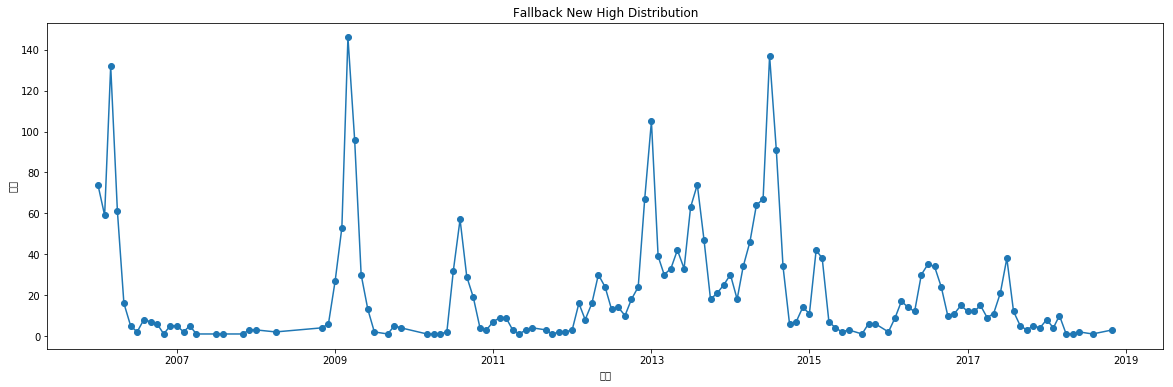

In [14]:
import matplotlib.pyplot as plt
z = z.sort_values(by="start_date",ascending= False)
z = z[z["target"] == 1]
dates = z["start_date"]
points = {}
for d in dates:
    s = d[:7]    
    points[s] = (1 if s not in points else points[s]+1)

x_axis = [datetime.strptime(d, '%Y-%m').date() for d in points]
y_axis = [points[d] for d in points]
# print(y_axis)
# pl.ylim(2007, 110)
plt.figure(1, figsize=(20, 6))
plt.title('Fallback New High Distribution')
plt.plot(x_axis, y_axis, 'o-')
plt.xlabel('日期')
plt.ylabel('次数')
plt.show()



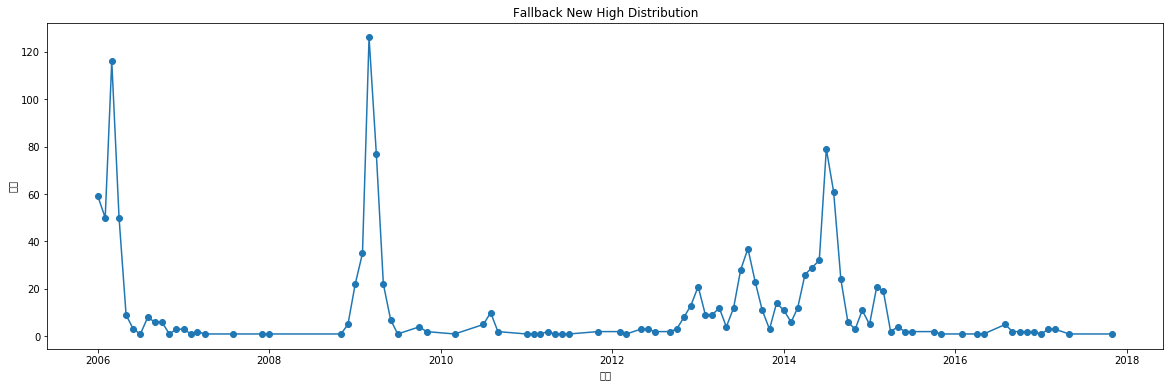

In [15]:
z = z.sort_values(by="start_date",ascending= False)
z = z[z["predict"] > 0.5]
dates = z["start_date"]
points = {}
for d in dates:
    s = d[:7]    
    points[s] = (1 if s not in points else points[s]+1)

x_axis = [datetime.strptime(d, '%Y-%m').date() for d in points]
y_axis = [points[d] for d in points]
# print(y_axis)
# pl.ylim(2007, 110)
plt.figure(1, figsize=(20, 6))
plt.title('Fallback New High Distribution')
plt.plot(x_axis, y_axis, 'o-')
plt.xlabel('日期')
plt.ylabel('次数')
plt.show()